In [424]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [55]:
#Read in the needed data for the assignment
df = pd.read_csv("abalone.csv", header=None)
X = df.iloc[:, :-1] #Select first 7 columns as predictors
y = df.iloc[:, -1:] #Select last column as the response
df

,0,1,2,3,4,5,6,7
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [86]:
#Set up the designated split
X_train, X_test, y_train, y_test = zip(*(train_test_split(X, y, test_size=0.1, random_state = i) for i in range(1,11)))
#zip(*) unpacks the lists to each variable

In [171]:
#Perform OLS regression on training and testing set analytically using linalg solver
betas_train = [np.linalg.solve(X_train[i].T @ X_train[i] + 0.0001, X_train[i].T @ y_train[i]) for i in range(10)]
betas_test = [np.linalg.solve(X_test[i].T @ X_test[i] + 0.0001, X_test[i].T @ y_test[i]) for i in range(10)]
#print(*betas_train, sep="\n"*2)

#Show that these match the regression
reg_train = [sm.OLS(y_train[i], X_train[i]).fit() for i in range(10)]
reg_test = [sm.OLS(y_test[i], X_test[i]).fit() for i in range(10)]
#for i in range(10):
#    print("beta value: " + str(betas_train[i]), "\t", "regression value: " + str(reg_train[i].params))

In [514]:
R2_train = np.mean([reg_train[i].rsquared for i in range(10)])
R2_test = np.mean([reg_test[i].rsquared for i in range(10)])
print("Average training R^2: {}".format(R2_train), "\nAverage testing R^2: {}".format(R2_test))

Average training R^2: 0.9538340808090503 
Average testing R^2: 0.9544242323901448


In [445]:
#Define a function to create regression trees
def run_tree_reg(X_train, X_test, y_train, y_test, depth):
    tree_reg = DecisionTreeRegressor(random_state = 42, max_depth = depth).fit(X_train, y_train)
    #this accuracy measure is the same as R^2
    acc_train = tree_reg.score(X_train, y_train)
    acc_test = tree_reg.score(X_test, y_test)
    #print("Tree depth: ", depth)
    #print("Training set accuracy: ", round(acc_train*100,4), "%")
    #print("Testing set accuracy: ", round(acc_test*100,4), "%")
    return acc_train, acc_test

In [477]:
#Create 7 regression trees for each depth asked
tree_acc_train = np.empty(shape= (7,10))
tree_acc_test = np.empty(shape= (7,10))
depth = range(1,8)
for i in depth:
    for k in range(10):
        tree_acc_train[i-1][k], tree_acc_test[i-1][k] = run_tree_reg(X_train[k], X_test[k], y_train[k], y_test[k], i)
        
#Calculate the mean for each tree depth
tree_R2_train_mean = [np.mean(tree_acc_train[i]) for i in range(7)]
tree_R2_test_mean = [np.mean(tree_acc_test[i]) for i in range(7)]

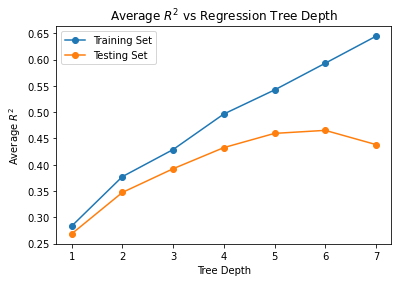

In [447]:
#Plot train and test R^2 vs the tree depth on the same graph
fig1 = plt.figure(1)
plt.plot(depth, tree_R2_train_mean, "-o", label = "Training Set")
plt.plot(depth, tree_R2_test_mean, "-o", label = "Testing Set")
plt.xlabel("Tree Depth")
plt.ylabel("Average $R^2$")
plt.title("Average $R^2$ vs Regression Tree Depth")
plt.legend()
plt.show()
#fig1.savefig("RegressionTree.jpg")

In [448]:
#Define a function to create random forest regressions
def run_rf_reg(X_train, X_test, y_train, y_test, trees):
    rf_reg = RandomForestRegressor(random_state = 42, n_estimators = trees).fit(X_train, y_train)
    #this accuracy measure is the same as R^2
    acc_train = rf_reg.score(X_train, y_train)
    acc_test = rf_reg.score(X_test, y_test)
    print("# of trees: ", trees)
    print("Training set accuracy: ", round(acc_train*100,4), "%")
    print("Testing set accuracy: ", round(acc_test*100,4), "%")
    return acc_train, acc_test

In [482]:
#Create a random forest regression for each different tree value (10, 30, 100, 300)
rf_acc_train = np.empty(shape= (4,10))
rf_acc_test = np.empty(shape= (4,10))
trees = [10, 30, 100, 300]
for i, tree in enumerate(trees):
    for k in range(10):
        rf_acc_train[i][k], rf_acc_test[i][k] = run_rf_reg(X_train[k], X_test[k], y_train[k].values.ravel(), y_test[k].values.ravel(), tree)

#Calculate the mean for each different tree count
rf_R2_train_mean = [np.mean(rf_acc_train[i]) for i in range(4)]
rf_R2_test_mean = [np.mean(rf_acc_test[i]) for i in range(4)]

# of trees:  10
Training set accuracy:  90.8854 %
Testing set accuracy:  50.9197 %
# of trees:  10
Training set accuracy:  91.3796 %
Testing set accuracy:  54.3409 %
# of trees:  10
Training set accuracy:  90.9868 %
Testing set accuracy:  43.6755 %
# of trees:  10
Training set accuracy:  90.943 %
Testing set accuracy:  46.8795 %
# of trees:  10
Training set accuracy:  91.1997 %
Testing set accuracy:  45.2086 %
# of trees:  10
Training set accuracy:  91.0068 %
Testing set accuracy:  53.034 %
# of trees:  10
Training set accuracy:  90.9491 %
Testing set accuracy:  54.0535 %
# of trees:  10
Training set accuracy:  91.2368 %
Testing set accuracy:  46.8877 %
# of trees:  10
Training set accuracy:  91.4719 %
Testing set accuracy:  45.4097 %
# of trees:  10
Training set accuracy:  91.0285 %
Testing set accuracy:  51.1451 %
# of trees:  30
Training set accuracy:  92.8033 %
Testing set accuracy:  52.6753 %
# of trees:  30
Training set accuracy:  93.0593 %
Testing set accuracy:  57.2001 %
# of t

In [509]:
print(*[f"\nNumber of trees: {tree}\n" + f"Average training R^2: {rf_R2_train_mean[i]}\n" + f"Average test R^2: {rf_R2_test_mean[i]}" for i, tree in enumerate(trees)])


Number of trees: 10
Average training R^2: 0.9110876880415122
Average test R^2: 0.4915543319539724 
Number of trees: 30
Average training R^2: 0.9294657061850128
Average test R^2: 0.5203696339365299 
Number of trees: 100
Average training R^2: 0.9359359149042124
Average test R^2: 0.5310779484789206 
Number of trees: 300
Average training R^2: 0.9376198871361738
Average test R^2: 0.5342216722496619
